#  Assignment 1 - Problem 4 

In [160]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

** Load Data **

In [161]:
mat = scipy.io.loadmat('flute.mat')

In [162]:
mat

{'X': array([[2.22044605e-16, 1.29702136e-05, 1.57052630e-04, ...,
         1.15280264e-04, 8.74255521e-05, 1.63280736e-05],
        [2.22044605e-16, 1.28594425e-05, 1.39508796e-04, ...,
         1.05180419e-04, 7.60410604e-05, 1.63024617e-05],
        [2.22044605e-16, 1.25292292e-05, 9.62568371e-05, ...,
         2.03686930e-05, 6.45660177e-05, 1.62111290e-05],
        ...,
        [2.22044605e-16, 2.12818388e-06, 1.39222966e-05, ...,
         6.50457997e-04, 7.28590830e-04, 7.49211070e-05],
        [2.22044605e-16, 1.07489520e-06, 1.47249087e-05, ...,
         2.32560534e-03, 1.09566897e-03, 7.82090463e-05],
        [2.22044605e-16, 2.44390213e-07, 1.34338008e-05, ...,
         3.36811451e-03, 1.25064417e-03, 7.93443075e-05]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 27 17:34:15 2018',
 '__version__': '1.0'}

In [163]:
flute=mat["X"]
flute.shape

(513, 73)

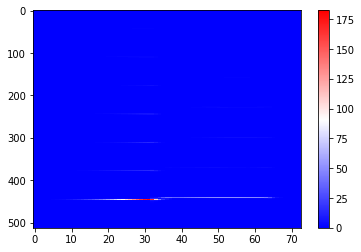

In [164]:
plt.imshow(flute,aspect='auto',cmap='bwr');
plt.colorbar()
plt.show()

** Problem 4.1. Write your own power iteration routine that calculates the eigenvector one by one **

### Following function with take a symmetric matrix as input and output most dominant igenvalue and corresponding eigen vector.

In [165]:
import numpy as np

def eigenvalue(A, v):
    
    Av = A.dot(v)
    v_new = Av / np.linalg.norm(Av)
    return v_new,np.linalg.norm(Av)

def power_iteration(A):
    n, d = A.shape
    v=np.random.rand(d,1)
    print(v.shape)
    ev,eigen_value = eigenvalue(A, v)
    count = 0
    while True:
        ev_new,eigen_value_new = eigenvalue(A, ev)
        print(np.abs(eigen_value - eigen_value_new))
        if np.abs(eigen_value - eigen_value_new) < 0.01:
            break
        ev = ev_new
        eigen_value = eigen_value_new
        count +=1
        print (f'Iteration {count} completed')
    print(f'Eigen Vector found in {count+1} iterations')  
    return ev_new, eigen_value_new

In [166]:
flute

array([[2.22044605e-16, 1.29702136e-05, 1.57052630e-04, ...,
        1.15280264e-04, 8.74255521e-05, 1.63280736e-05],
       [2.22044605e-16, 1.28594425e-05, 1.39508796e-04, ...,
        1.05180419e-04, 7.60410604e-05, 1.63024617e-05],
       [2.22044605e-16, 1.25292292e-05, 9.62568371e-05, ...,
        2.03686930e-05, 6.45660177e-05, 1.62111290e-05],
       ...,
       [2.22044605e-16, 2.12818388e-06, 1.39222966e-05, ...,
        6.50457997e-04, 7.28590830e-04, 7.49211070e-05],
       [2.22044605e-16, 1.07489520e-06, 1.47249087e-05, ...,
        2.32560534e-03, 1.09566897e-03, 7.82090463e-05],
       [2.22044605e-16, 2.44390213e-07, 1.34338008e-05, ...,
        3.36811451e-03, 1.25064417e-03, 7.93443075e-05]])

** Problem 4.3 Compute the sample covariance matrix out of them. It must be a 513 X 513 symmetric matrix. **

In [167]:
import numpy as np


def covariencematrix(m):
    n, d = m.shape
    print(f'n = {n}')
    print(f'd = {d}')
    print(f'shape of A is {m.shape}')
    mean = m.mean(axis=1).reshape(n,1)
    print(f'shape of mean = {mean.shape}')
    m = m-mean
    dot_prod = np.dot(m,m.T)
    
    return dot_prod/(d-1)
    

### Lets calculate the co-varience matrix of s from the function covariencematrix

In [168]:
cov_mat=covariencematrix(flute)
cov_mat.shape

n = 513
d = 73
shape of A is (513, 73)
shape of mean = (513, 1)


(513, 513)

In [169]:
print(np.allclose(np.cov(flute),cov_mat))

True


** Problem 4.3 Learn two eigenvectors from this by using your power iteration routine **

### Calculate first Eigen vector and corresponding eigen value

Eigenvectors correspond to the left singular vectors once the input matrix of the eigendecomposition is the covariance matrix

In [170]:
first_eigen_vector, first_eigen_value = power_iteration(cov_mat)
print(f'First Eigen Value is {first_eigen_value}')

(513, 1)
333.81286834966704
Iteration 1 completed
80.11502261069836
Iteration 2 completed
1.686141267725361
Iteration 3 completed
0.03445240736982669
Iteration 4 completed
0.0007035100479697576
Eigen Vector found in 5 iterations
First Eigen Value is 4102.098915481698


Now as per the formula,
\begin{equation*}
\ A = 
\mathbf{v}_1 \mathbf{s}_1 \mathbf{u}_1^T + [v2,v3,v4....v_k] .  \begin{vmatrix}
\mathbf{s}_1 & \mathbf0 & \mathbf0 \\
\mathbf0 & \mathbf{s}_1  & \mathbf0 \\
\mathbf{s}_1 & \mathbf0 & \mathbf{s}_1
\end{vmatrix}
\end{equation*}

As we have got first Eigen Value and Eigen Vector, lets subtract the first part from A and call power Iteration for second Eigen value and vector,

\begin{equation*}
\ A - 
\mathbf{v}_1 \mathbf{s}_1 \mathbf{u}_1^T = [v2,v3,v4....v_k] .  \begin{vmatrix}
\mathbf{s}_1 & \mathbf0 & \mathbf0 \\
\mathbf0 & \mathbf{s}_1  & \mathbf0 \\
\mathbf{s}_1 & \mathbf0 & \mathbf{s}_1
\end{vmatrix}
\end{equation*}


$ u_i = A^T v_i/s_i $
        

### Calculate second Eigen value and second Eigen vector,

 $ \textbf {Step 1: Calculate  }u_i $

In [171]:
ui = cov_mat.T.dot(first_eigen_vector/first_eigen_value)

$ \textbf {Step 2: Calculate new covariance matrix to be feeded to Power Iteration routine} $

In [172]:
new_cov_mat = cov_mat - ((first_eigen_vector*first_eigen_value).dot(ui.T))

$ \textbf{ Step 3: Calculate second Eigen vector and corresponding eigen value} $

In [173]:
second_eigen_vector, second_eigen_value = power_iteration(new_cov_mat)
print(f'second Eigen Value is {second_eigen_value}')

(513, 1)
251.15890893918333
Iteration 1 completed
0.46266350816495105
Iteration 2 completed
0.0003519001795666554
Eigen Vector found in 3 iterations
second Eigen Value is 586.176801190564


### Plot your eigenvectors and put them on your report along with the X matrix.

In [174]:
left_singular_matrix = np.hstack((first_eigen_vector,second_eigen_vector))


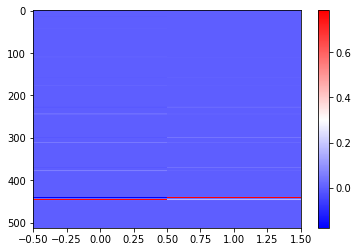

In [175]:
plt.imshow(left_singular_matrix,cmap='bwr',aspect='auto');
plt.colorbar()
plt.show()

** Problem 4.4 Now you know the representative spectra for the two notes. How would you recover their temporal activation? They will be two row vectors for the two notes, respectively. You need to show me how to calculate these activation vectors in equations. Plot the activation (row) vectors you got from this procedure in the report.**

** Temporal Activation would be obtained by $ A^T v_d/s_d $ **

In [176]:
rec_temp1 = np.dot(flute.T,(first_eigen_vector/first_eigen_value))
rec_temp2 = np.dot(flute.T,(second_eigen_vector/second_eigen_value))

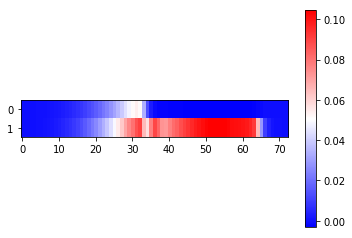

In [177]:
right_singular_matrix = np.vstack((rec_temp1.T,rec_temp2.T))
plt.imshow(right_singular_matrix,cmap = 'bwr', aspect='5')
plt.colorbar()
plt.show()

\begin{equation*}
\ A = 
\ [v1,v2,...v_d] .  \begin{vmatrix}
\mathbf{s}_1 & \mathbf0 & \mathbf0 \\
\mathbf0 & \mathbf{s}_2  & \mathbf0 \\
\mathbf{s}_1 & \mathbf0 & \mathbf{s}_d 
\end{vmatrix}
\ . \begin{vmatrix}
\mathbf{u}_1^T \\
\mathbf{u}_2^T \\ 
\mathbf{u}_d^T
\end{vmatrix}
\end{equation*}


In [178]:
s = np.diag(np.array([first_eigen_value,second_eigen_value]))
s

array([[4102.09891548,    0.        ],
       [   0.        ,  586.17680119]])

In [179]:
reconstruct_freq = np.dot(np.dot(left_singular_matrix,s),right_singular_matrix)

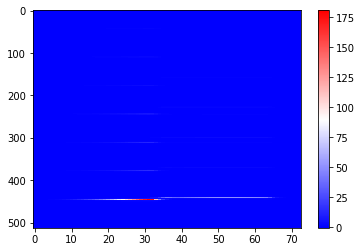

In [180]:
plt.imshow(reconstruct_freq,aspect='auto',cmap='bwr')
plt.colorbar()
plt.show()

In [181]:
reconstruct_freq.shape

(513, 73)

In [182]:
rec_err1 = (flute - reconstruct_freq)
mse1 = ((rec_err1 ** 2).mean(axis=None))
mse1

0.05236130814460967

In [183]:
recons_error= pd.DataFrame(columns=["Approach", "MSE"])
recons_error.loc[len(recons_error)] = ["Method_1", mse1]
recons_error

,Approach,MSE
0,Method_1,0.052361


** Problem 4.5 : Another alternative approach would be to calculate the covariance matrixout of $ X^T $ , which will give you a 73 X 73 matrix. By doing so, you can say that you have 513 observed samples, each of which has 73 dimensions. Perform power iteration twice to get the two eigenvectors. They should correspond to the temporal activations you calculated in the previous question, but this time you got them in a different way. How would you get the representative spectra this time? **

** Calculate the covariance matrix out of $ X^T $ , which will give you a 73 X 73 matrix **

In [184]:
flute_cov_tp = covariencematrix(flute.T)
flute_cov_tp.shape

n = 73
d = 513
shape of A is (73, 513)
shape of mean = (73, 1)


(73, 73)

In [185]:
flute_cov_tp

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.67733425e-10, 1.91616245e-08, ...,
        4.33686794e-08, 1.57130792e-08, 1.59779526e-09],
       [0.00000000e+00, 1.91616245e-08, 9.93836775e-07, ...,
        6.13013523e-07, 3.30323785e-07, 4.85588027e-08],
       ...,
       [0.00000000e+00, 4.33686794e-08, 6.13013523e-07, ...,
        1.71114314e-05, 4.35028675e-06, 2.27279787e-07],
       [0.00000000e+00, 1.57130792e-08, 3.30323785e-07, ...,
        4.35028675e-06, 1.26988861e-06, 8.07974396e-08],
       [0.00000000e+00, 1.59779526e-09, 4.85588027e-08, ...,
        2.27279787e-07, 8.07974396e-08, 7.81014978e-09]])

### Calculate first temporal activation vector and corresponding temporal activation value



In [186]:
temp_vector1, temp_value1 = power_iteration(flute_cov_tp)
print(f'First Temporal Value of transposed matrix A is {first_eigen_value_t}')

(73, 1)
829.8639391119735
Iteration 1 completed
27.686204346671957
Iteration 2 completed
1.981709912080305
Iteration 3 completed
0.13288825523500236
Iteration 4 completed
0.008870759569845177
Eigen Vector found in 5 iterations
First Temporal Value of transposed matrix A is 715.2420374708651


Now as per the formula,
\begin{equation*}
\ A = 
\mathbf{v}_1 \mathbf{s}_1 \mathbf{u}_1^T + [v2,v3,v4....v_k] .  \begin{vmatrix}
\mathbf{s}_1 & \mathbf0 & \mathbf0 \\
\mathbf0 & \mathbf{s}_1  & \mathbf0 \\
\mathbf{s}_1 & \mathbf0 & \mathbf{s}_1
\end{vmatrix}
\end{equation*}

Now as we have got first Igen Value and Igen Vector, lets subtract the first part from A and call power Iteration for second Igen value and vector,

\begin{equation*}
\ A - 
\mathbf{v}_1 \mathbf{s}_1 \mathbf{u}_1^T = [v2,v3,v4....v_k] .  \begin{vmatrix}
\mathbf{s}_1 & \mathbf0 & \mathbf0 \\
\mathbf0 & \mathbf{s}_1  & \mathbf0 \\
\mathbf{s}_1 & \mathbf0 & \mathbf{s}_1
\end{vmatrix}
\end{equation*}


$ u_i = A^T v_i/s_i $

#### Calculate second Temporal Activation value and second Temporal Activation  vector,

  ** Step 1: Calculate  temp_u_1 **

In [187]:
temp_u_1 = flute_cov_tp.T.dot(temp_vector1/temp_value1)

$ \textbf {Step 2: Calculate new covariance matrix to be feeded to Power Iteration routine} $

In [188]:
new_cov_mat = flute_cov_tp - ((temp_vector1*temp_value1).dot(temp_u_1.T))

$ \textbf{ Step 3: Calculate second Temporal activation vector and corresponding Temporal activation value} $

In [189]:
temp_vector2, temp_value2 = power_iteration(new_cov_mat)
print(f'Second Temporal Value of transposed matrix A is {temp_value2}')

(73, 1)
353.0209891046612
Iteration 1 completed
5.0425148430122135e-05
Eigen Vector found in 2 iterations
Second Temporal Value of transposed matrix A is 184.7649586811092


In [190]:
temp_u_2 = flute_cov_tp.T.dot(temp_vector2/temp_value2)

In [191]:
temp_activation = np.vstack((temp_vector1.T,temp_vector2.T))
temp_activation.shape

(2, 73)

** How would you get the representative spectra this time? **

In [193]:
rec_freq1 = np.dot(flute,temp_vector1)/temp_value1
rec_freq2 = np.dot(flute,temp_vector2)/temp_value2
rec_freq1.shape

(513, 1)

In [194]:
left_singular_mat2 = np.hstack((rec_freq1,rec_freq2))
left_singular_mat2.shape

(513, 2)

In [195]:
s2 = np.diag(np.array([temp_value1,temp_value2]))
s2

array([[715.24146232,   0.        ],
       [  0.        , 184.76495868]])

In [196]:
reconstruct_freq2 = np.dot(np.dot(left_singular_mat2,s2),temp_activation)

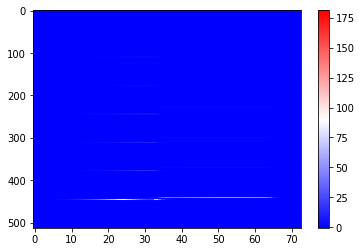

In [197]:
plt.imshow(reconstruct_freq2,aspect='auto',cmap='bwr')
plt.colorbar()
plt.show()

In [198]:
rec_err2 = (flute - reconstruct_freq2)
mse2 = ((rec_err2 ** 2).mean(axis=None))
mse2

0.05017449498464332

In [199]:
recons_error.loc[len(recons_error)] = ["Method_2", mse2]
recons_error

,Approach,MSE
0,Method_1,0.052361
1,Method_2,0.050174


** Problem 6. Out of the two approaches, i.e. doing eigendecomposition on the original data matrix and its transposed version, which do you prefer? Explain your preference. I need a clear reason. **

As we can see above, that MSE in case of method 2 is little bit lesser than method 1. Also we got temporal activation pretty easily directly from Eigen vectors. In method 1 temporal activations were calculated from representative spectra. Hence I think temporal activations were easily reconstructed in method 2 and also better though significantly less MSE. So, I would prefer method 2.